### Homework_06 - Santiago Tabares
**1036666894**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow import one_hot
from tensorflow.keras import regularizers

In [71]:
df = pd.read_csv("mnist_test.csv", sep=',')
X_data = df.drop(['label'], axis=1).to_numpy()
y_data = df[['label']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 

# One-hot encoding
y_train_hot = one_hot(y_train, depth=10)
y_test_hot = one_hot(y_test, depth=10)

tf.random.set_seed(42) # Establish a seed

In [72]:
X_data.shape

(10000, 784)

## Neural Network Model

In [91]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=64,kernel_regularizer = regularizers.l1(1e-3), activation='relu',name='layer_hidden1'),
                  Dense(units=64,kernel_regularizer = regularizers.l1(1e-3), activation='relu',name='layer_hidden2'),   
                  Dense(units=20, activation='relu',name='layer_hidden3'),   
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

In [92]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_hidden1 (Dense)       (None, 64)                50240     
                                                                 
 layer_hidden2 (Dense)       (None, 64)                4160      
                                                                 
 layer_hidden3 (Dense)       (None, 20)                1300      
                                                                 
 output_layer (Dense)        (None, 10)                210       
                                                                 
Total params: 55,910
Trainable params: 55,910
Non-trainable params: 0
_________________________________________________________________


In [93]:
def compile_model(model):
        model.compile(optimizer="adam",
              loss='categorical_crossentropy', #one-hot  
              metrics=['accuracy'])

In [94]:
model = get_model(X_train[0].shape)
compile_model(model)

epochs=70
history=model.fit(X_train, y_train_hot[:,0],  epochs=epochs, validation_split=0.2, verbose=True)

Epoch 1/70
200/200 [==============================] - 1s 3ms/step - loss: 7.3402 - accuracy: 0.5022 - val_loss: 3.1304 - val_accuracy: 0.6594
Epoch 2/70
200/200 [==============================] - 0s 2ms/step - loss: 2.7154 - accuracy: 0.7305 - val_loss: 2.6761 - val_accuracy: 0.7513
Epoch 3/70
200/200 [==============================] - 0s 2ms/step - loss: 2.3395 - accuracy: 0.8086 - val_loss: 2.5093 - val_accuracy: 0.7837
Epoch 4/70
200/200 [==============================] - 0s 2ms/step - loss: 2.1209 - accuracy: 0.8481 - val_loss: 2.3246 - val_accuracy: 0.8400
Epoch 5/70
200/200 [==============================] - 0s 2ms/step - loss: 1.9384 - accuracy: 0.8747 - val_loss: 2.2825 - val_accuracy: 0.8369
Epoch 6/70
200/200 [==============================] - 1s 3ms/step - loss: 1.8370 - accuracy: 0.8858 - val_loss: 2.0411 - val_accuracy: 0.8587
Epoch 7/70
200/200 [==============================] - 0s 2ms/step - loss: 1.7290 - accuracy: 0.8948 - val_loss: 1.9827 - val_accuracy: 0.8687
Epoch 

### Evaluation of the Model

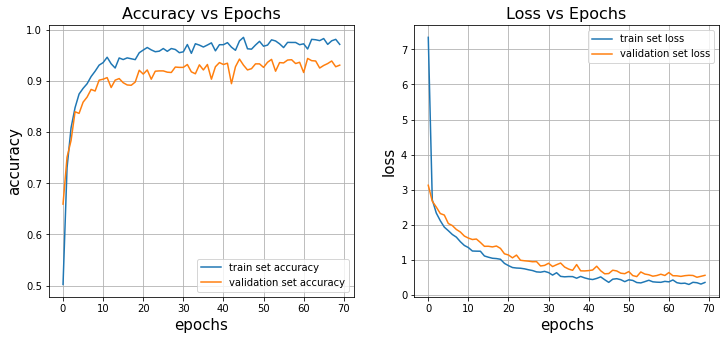

In [95]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].plot(history.history['accuracy'],label='train set accuracy')
ax[0].plot(history.history['val_accuracy'],label='validation set accuracy')
ax[0].set_title('Accuracy vs Epochs', fontsize=16)
ax[0].set_xlabel('epochs', fontsize=15)
ax[0].set_ylabel('accuracy', fontsize=15)
ax[0].legend()
ax[0].grid()

ax[1].plot(history.history['loss'],label='train set loss')
ax[1].plot(history.history['val_loss'],label='validation set loss')
ax[1].set_title('Loss vs Epochs', fontsize=16)
ax[1].set_xlabel('epochs', fontsize=15)
ax[1].set_ylabel('loss', fontsize=15)
ax[1].legend()
ax[1].grid()


In [97]:
loss, accuracy=model.evaluate(X_test, y_test_hot[:,0], verbose=False)
print('accuracy',accuracy)

accuracy 0.925000011920929


The built model has good accuracy and it can predcit very well. It doesn't show overfitting and it has good learning curves.